#### Appendix (LDA) - Evolution of Topic Over Time

This notebook is for the analysis of the results from the LDA topic modeling.
 * It shows in two different graphs the evolution of topic "usage" over time in Copom Minutes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
INITIAL_DATE = "2003-06-26"

In [3]:
minutes_info = pd.read_excel("./data/raw/minutes_info.xlsx")
minutes_info['DataReferencia'] = pd.to_datetime(minutes_info['DataReferencia'])
minutes_info.set_index("Titulo", inplace=True)
minutes_info = minutes_info[minutes_info["DataReferencia"] >= INITIAL_DATE]

df_results = pd.read_excel("./data/processed/lda_results.xlsx")
df_results["date"] = df_results.minute.map(minutes_info['DataReferencia'])

df_results = df_results.sort_values("date")
df_results

,minute,original_text,lemm_text,dominant_topic,date
8912,86th Copom minutes,"61. In June, as a result of the appreciation o...",june result appreciation real low rollover swa...,2,2003-07-23
8878,86th Copom minutes,"27. If the recent trend of inflation persists,...",recent trend inflation persists real interest ...,5,2003-07-23
8877,86th Copom minutes,26. The Copom remains concerned about the risk...,copom remain concern risk set inflation path c...,5,2003-07-23
8876,86th Copom minutes,"25. The Central Bank’s inflation forecasts, co...",central bank inflation forecast consider basel...,1,2003-07-23
8875,86th Copom minutes,24. The median of market expectations for infl...,median market expectation inflation survey ger...,1,2003-07-23
...,...,...,...,...,...
8966,85th Copom minutes,"53. After the last Copom meeting, the yield cu...",last copom meeting yield curve shift downwards...,1,NaT
8967,85th Copom minutes,54. Securities and swaps maturing since the pr...,security swap mature since previous meeting ro...,2,NaT
8968,85th Copom minutes,"55. Since the May Copom meeting, the Treasury ...",since may copom meeting treasury offer ltns fi...,2,NaT
8969,85th Copom minutes,56. The settlement of securities between May 2...,settlement security may june cause contraction...,2,NaT


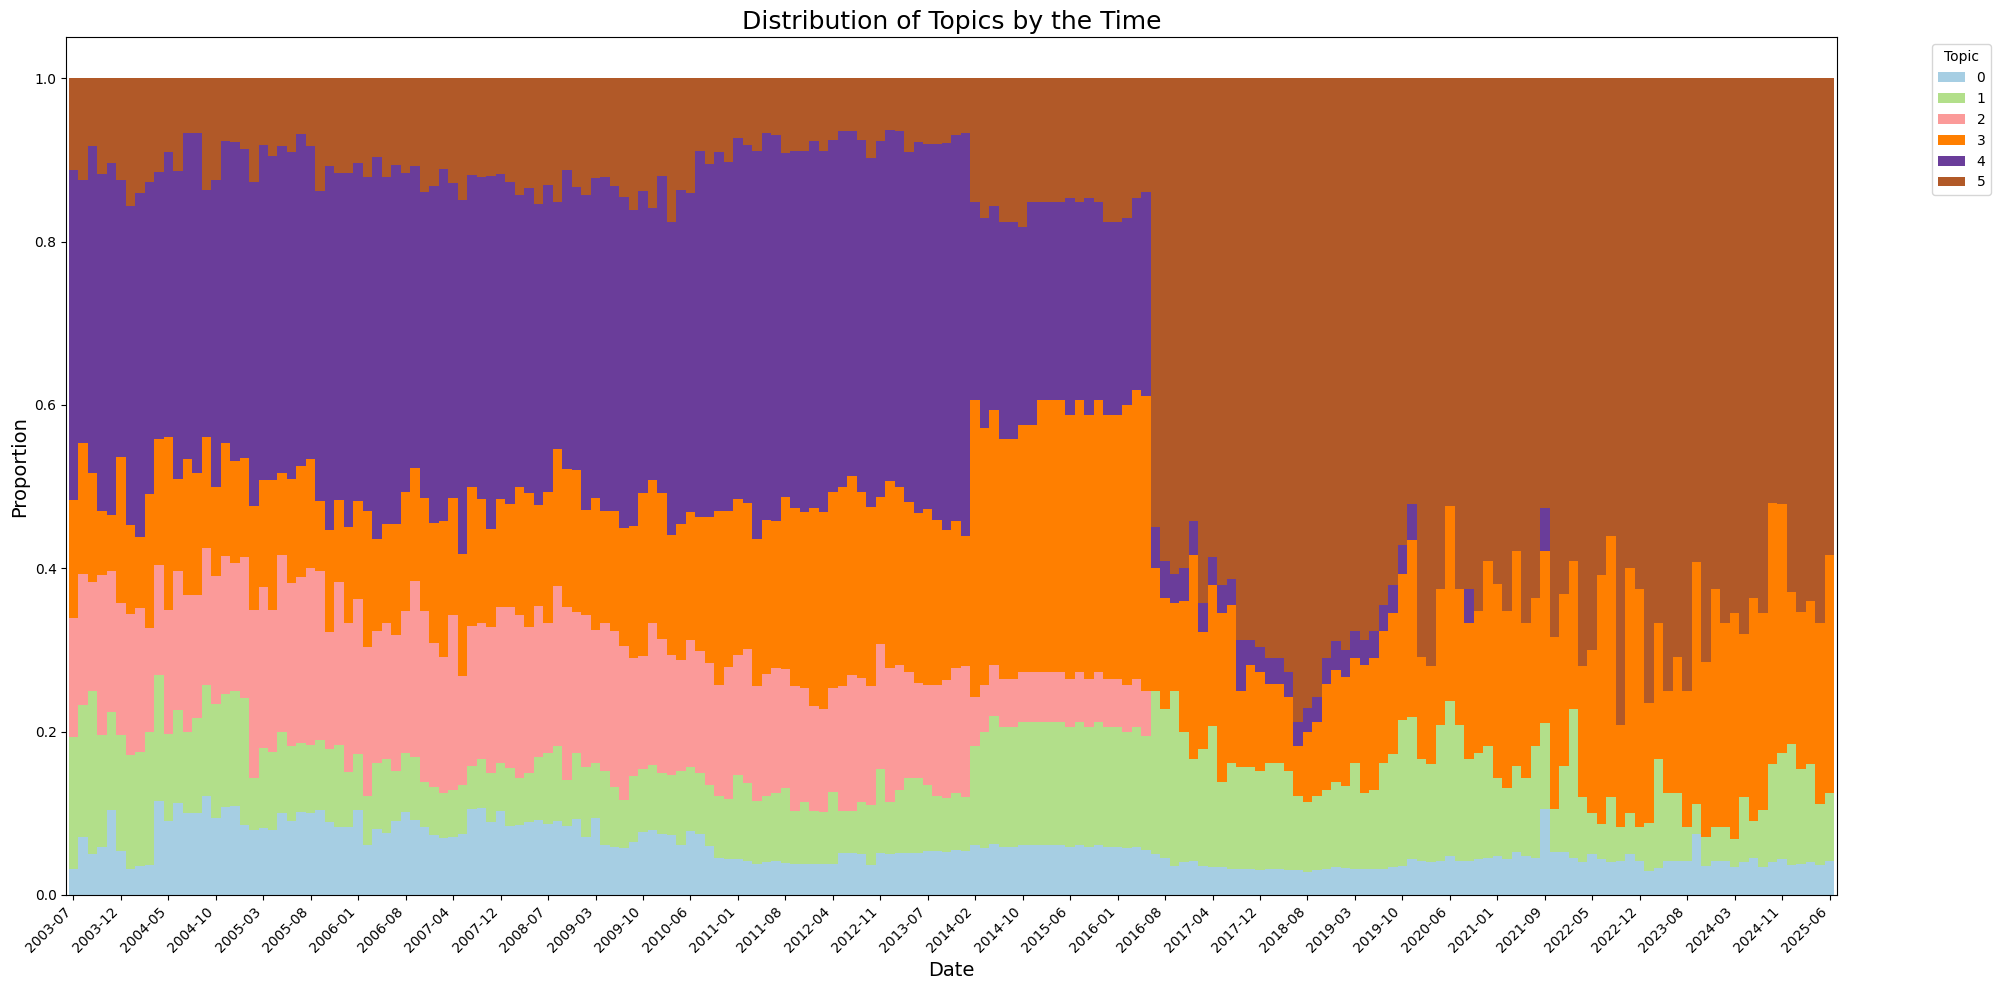

In [4]:
topic_counts_by_date = df_results.groupby(['date', 'dominant_topic']).size().unstack(fill_value=0)
topic_proportions_by_date = topic_counts_by_date.div(topic_counts_by_date.sum(axis=1), axis=0)
topic_proportions_by_date.index = topic_proportions_by_date.index.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(20, 10))
topic_proportions_by_date.plot(kind='bar', stacked=True, width=1.0, ax=ax, colormap='Paired')

n = 5 
ticks = ax.xaxis.get_ticklocs()[::n]
labels = ax.get_xticklabels()[::n]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha="right")

plt.title('Distribution of Topics by the Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


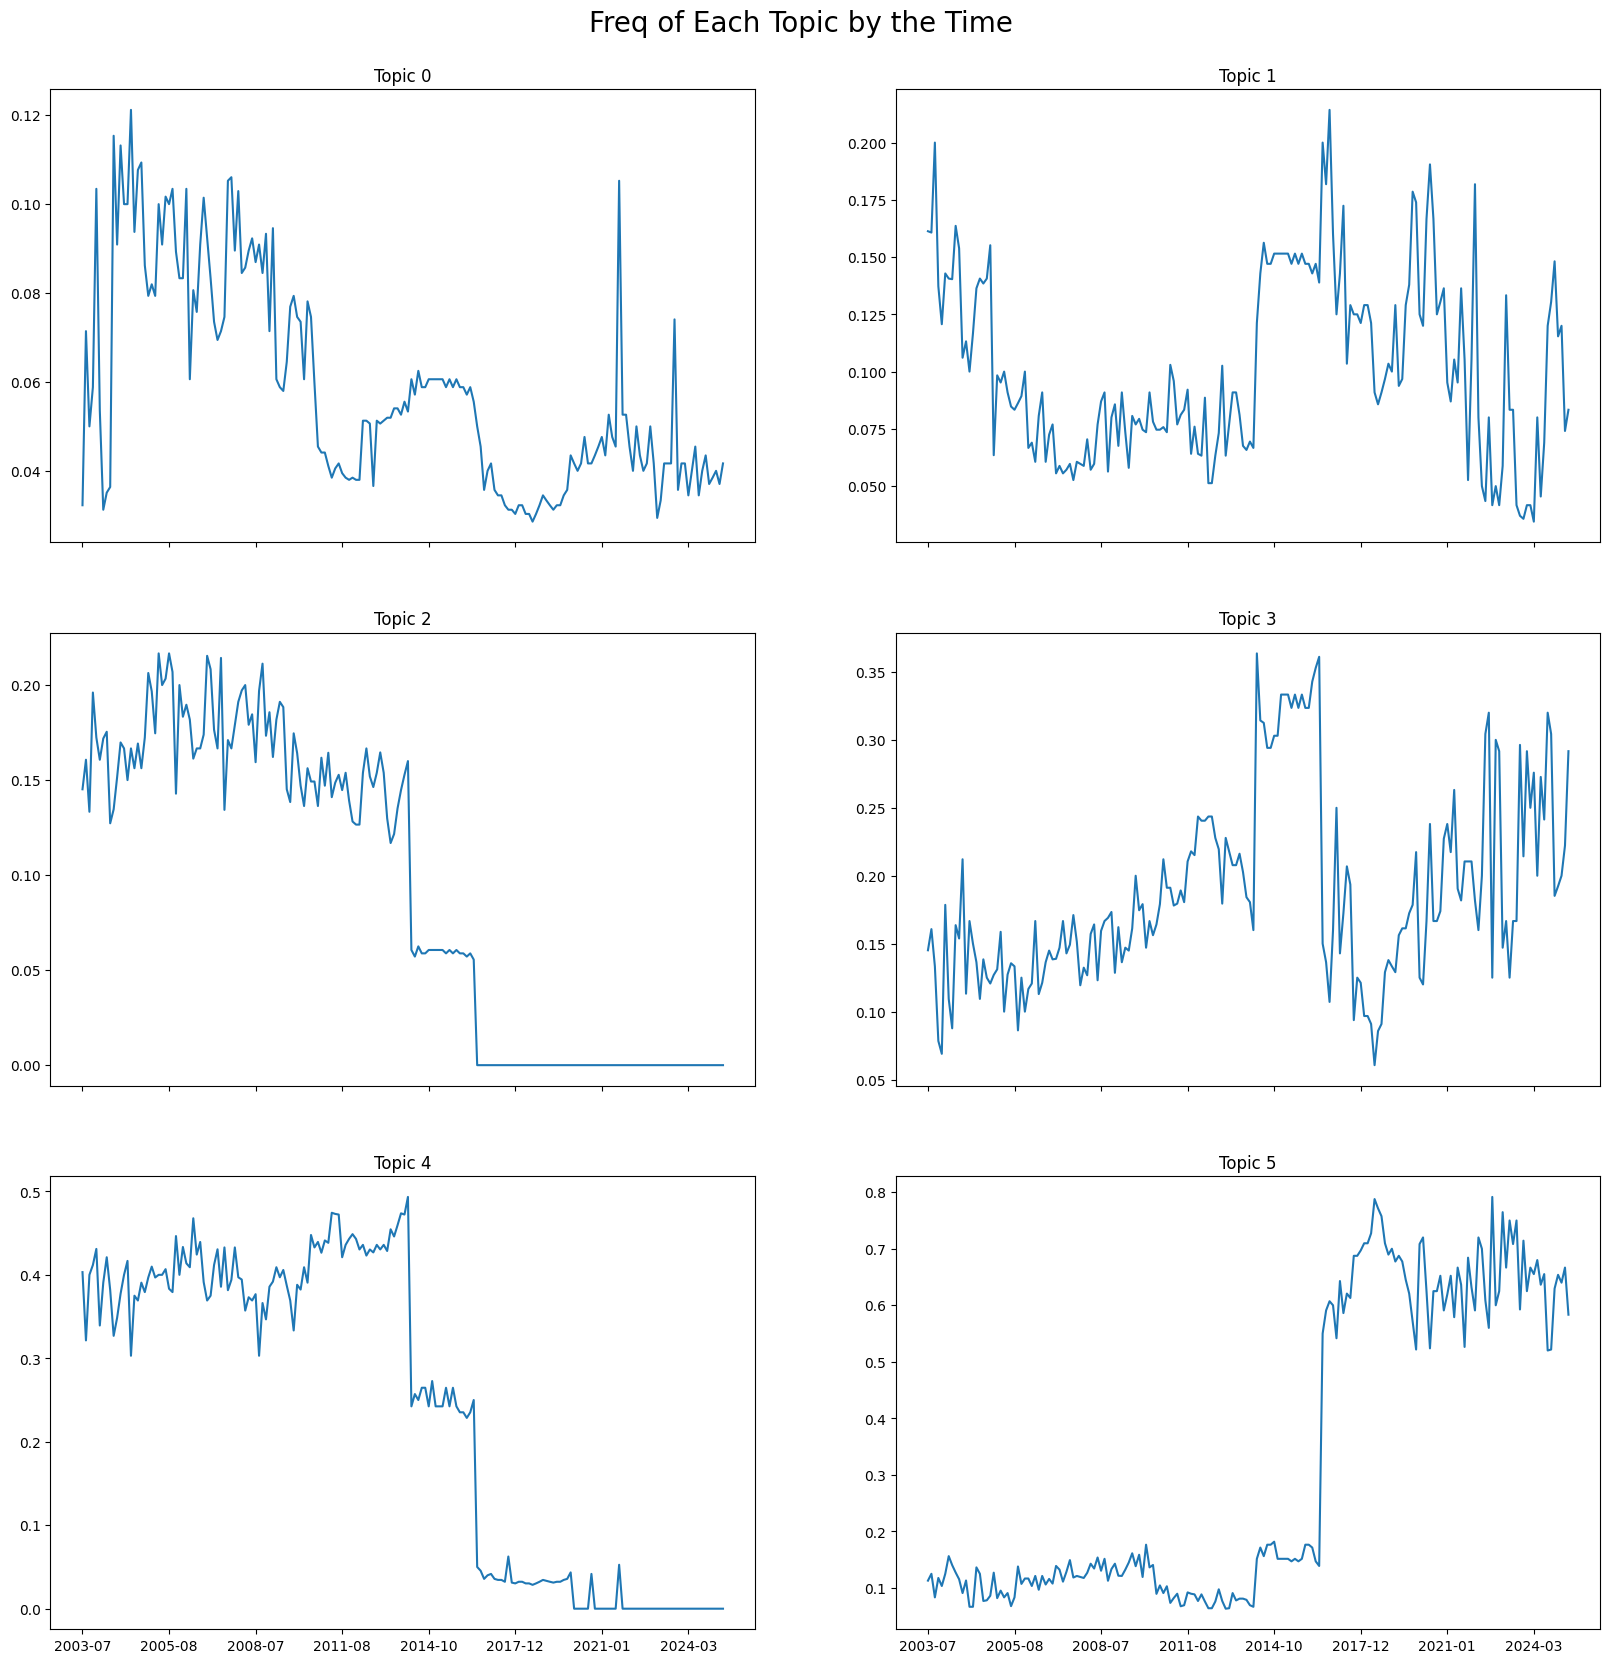

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharex=True)
fig.suptitle('Freq of Each Topic by the Time', fontsize=20, y=0.92)

for i, ax in enumerate(axes.flatten()):
    if i < len(topic_proportions_by_date.columns):
        topic_proportions_by_date[i].plot(ax=ax)
        ax.set_title(f'Topic {i}')
        ax.set_xlabel('')

plt.show()